In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import norm

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df_diabetic = pd.read_csv('diabetic_data.csv')

<ipython-input-17-38ab53f8520f>:1: DtypeWarning: Columns (3,4,7,10,17,22,27,28,29,30,31,33,37,41,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_diabetic = pd.read_csv('diabetic_data.csv')


In [ ]:
df_IDS = pd.read_csv('IDS_mapping.csv')

In [ ]:
df_diabetic

,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,admission_source_id,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,admission_type_id,insulin,repaglinide,nateglinide,discharge_disposition_id,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin
0,250.83,No,Caucasian,0,NaN,No,No,1,No,No,1,NaN,No,?,No,No,?,1,No,name,Female,No,2278392,No,No,No,No,41,1,1,0,8222157,No,0,No,NaN,?,6,No,No,No,25,[0-10),Pediatrics-Endocrinology,No,No,No,?,No,No,No,?,No,NO,0,No,No
1,276,No,Caucasian,0,NaN,No,No,9,No,No,3,NaN,No,250.01,No,No,?,1,No,name,Female,Ch,149190,No,No,No,No,59,18,7,0,55629189,No,0,No,NaN,?,1,Up,No,No,1,[10-20),?,No,No,No,?,Yes,No,No,255,No,>30,0,No,No
2,648,No,AfricanAmerican,1,NaN,No,No,6,No,No,2,NaN,No,250,No,No,?,1,No,name,Female,No,64410,Steady,No,No,No,11,13,7,0,86047875,No,5,No,NaN,?,1,No,No,No,1,[20-30),?,No,No,No,?,Yes,No,No,V27,No,NO,2,No,No
3,8,No,Caucasian,0,NaN,No,No,7,No,No,2,NaN,No,250.43,No,No,?,1,No,name,Male,Ch,500364,No,No,No,No,44,16,7,0,82442376,No,1,No,NaN,?,1,Up,No,No,1,[30-40),?,No,No,No,?,Yes,No,No,403,No,NO,0,No,No
4,197,No,Caucasian,0,NaN,No,No,5,No,No,1,NaN,No,157,No,No,?,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,7,0,42519267,No,0,No,NaN,?,1,Steady,No,No,1,[40-50),?,No,No,No,?,Yes,No,No,250,No,NO,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223529,618,No,Hispanic,0,NaN,No,No,8,No,No,2,NaN,No,625,No,No,?,1,No,name,Female,No,33735900,No,No,No,No,23,19,1,0,2261385,No,5,No,NaN,?,3,No,No,No,1,[40-50),ObstetricsandGynecology,No,No,No,?,No,No,No,218,No,NO,0,No,No
223530,153,No,Caucasian,4,NaN,No,No,7,No,No,3,NaN,No,287,No,No,OG,1,No,name,Male,No,384887420,No,No,No,No,35,8,1,0,46020915,No,2,No,NaN,OG,3,No,No,No,1,[60-70),Hematology,No,No,No,?,No,No,No,571,No,<30,0,No,No
223531,38,No,AfricanAmerican,0,NaN,No,No,6,No,No,2,NaN,No,276,No,No,MC,1,No,name,Male,No,168337386,No,No,No,No,43,3,7,0,24122547,No,0,No,NaN,MC,1,No,No,No,11,[70-80),InternalMedicine,No,No,No,?,No,No,No,599,No,NO,0,No,No
223532,250.7,Steady,Caucasian,0,NaN,No,No,9,No,No,6,NaN,No,440,No,No,?,1,No,name,Female,Ch,39335172,No,No,No,No,49,13,7,0,11529045,No,1,No,NaN,?,1,No,No,No,18,[80-90),?,No,No,No,?,Yes,No,No,401,No,NO,0,No,Steady


In [ ]:
df_IDS.head(50)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [ ]:
df_admission_type_id = df_IDS.loc[0:7]
df_admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
df_discharge_disposition_id =  df_IDS.loc[10:39].rename(columns={'admission_type_id': 'discharge_disposition_id'})
df_discharge_disposition_id

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [ ]:
df_admission_source_id = df_IDS.loc[42:49].rename(columns={'admission_type_id': 'admission_source_id'})
df_admission_source_id

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement


In [ ]:
df_diabetic['admission_source_id'].unique()

array([1, 7, 2, 4, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22, 11, 25, 13, '7',
       '5', '1', '6', '4', '17', '9', '2', '22', '25', 'abcde', '20', '3',
       '8', '13', '10'], dtype=object)

#  Data QA #

**Inspeccion inicial del data set**

In [ ]:
df_diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223534 entries, 0 to 223533
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   diag_1                    223534 non-null  object
 1   glyburide                 223534 non-null  object
 2   race                      223534 non-null  object
 3   number_inpatient          223534 non-null  object
 4   out                       3 non-null       object
 5   acarbose                  223534 non-null  object
 6   glyburide-metformin_2     223534 non-null  object
 7   number_diagnoses          223534 non-null  object
 8   metformin-rosiglitazone   223534 non-null  object
 9   chlorpropamide            223534 non-null  object
 10  time_in_hospital          223534 non-null  object
 11  A1Cresult                 37315 non-null   object
 12  examide                   223534 non-null  object
 13  diag_2                    223534 non-null  object
 14  tola

In [ ]:
df_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df_diabetic.describe()
#Analizar = ['payer_code','medical_specialty','citoglipton','examide','glimepiride-pioglitazone','weight']

,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,admission_source_id,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,admission_type_id,insulin,repaglinide,nateglinide,discharge_disposition_id,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin
count,223534,223534,223534,223534,3,223534,223534,223534,223534,223534,223534,37315,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,11748,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534,223534
unique,718,5,7,40,1,5,5,33,3,5,29,4,2,750,4,2,19,3,5,2,4,3,134277,5,3,3,5,228,144,33,55,99577,3,15,3,4,19,17,5,5,5,53,11,74,3,5,3,11,3,5,3,791,5,4,69,3,5
top,428,No,Caucasian,0,abcde,No,No,9,No,No,3,>8,No,276,No,No,?,1,No,name,Female,No,414312614,No,No,No,No,1,13,7,0,88785891,No,0,No,Norm,?,1,No,No,No,1,[70-80),?,No,No,No,?,Yes,No,No,250,No,NO,0,No,No
freq,15032,200122,167172,119231,3,222849,221991,88202,223526,223340,31527,17985,223531,14725,223447,223531,88492,180224,223446,223531,120149,120284,3,195566,223529,223504,212130,5725,10780,101405,159470,74,223529,82793,223529,5711,88492,95057,104050,220172,221998,106946,57215,109712,223525,209551,223529,216510,172222,207404,223525,25347,221991,120478,149542,223482,179619


**Indentificacion y manejo de vallores faltantes**

In [ ]:
#verificar datos nulos para df_usuarios
total = df_diabetic.isnull().sum().sort_values(ascending = False)
porcentaje = (df_diabetic.isnull().sum() / df_diabetic.isnull().count()).sort_values(ascending = False)
df_diabetic_null = pd.concat([total,porcentaje] , axis = 1 , keys = ['Total' , 'Porcentajes'])
df_diabetic_null

,Total,Porcentajes
out,223531,0.999987
max_glu_serum,211786,0.947444
A1Cresult,186219,0.833068
race,0,0.000000
diag_1,0,0.000000
acarbose,0,0.000000
glyburide-metformin_2,0,0.000000
number_diagnoses,0,0.000000
glyburide,0,0.000000
metformin-rosiglitazone,0,0.000000


In [ ]:
df_diabetic['out'].value_counts()

,count
out,
abcde,3


In [ ]:
df_diabetic['A1Cresult'].value_counts()

,count
A1Cresult,
>8,17985
Norm,10916
>7,8411
abcde,3


In [ ]:
df_diabetic['max_glu_serum'].value_counts()

,count
max_glu_serum,
Norm,5711
>200,3250
>300,2784
abcde,3


In [ ]:
 df_diabetic[df_diabetic['out'].notna()]

,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,admission_source_id,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,admission_type_id,insulin,repaglinide,nateglinide,discharge_disposition_id,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin
101766,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde
203533,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde
221610,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde


In [ ]:
duplicadas = df_diabetic.T.duplicated()  # Verifica columnas duplicadas
df_duplicadas = df_diabetic.loc[:, duplicadas]  # Filtra solo las columnas duplicadas

print("Columnas duplicadas encontradas:")
print(df_duplicadas.columns.tolist())

Columnas duplicadas encontradas:
['citoglipton', 'metformin-pioglitazone', 'payer_code', 'troglitazone', 'glyburide-metformin']


In [ ]:
#Lista para ordenar el df
list_order = ['encounter_id','patient_nbr','race','gender','age','weight','admission_type_id','discharge_disposition_id',
              'admission_source_id','time_in_hospital','payer_code','medical_specialty','num_lab_procedures',
              'num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2',
              'diag_3','number_diagnoses','max_glu_serum','A1Cresult','change','diabetesMed','metformin','repaglinide','nateglinide','chlorpropamide',
              'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
              'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
              'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','readmitted']

In [ ]:
#FUNCION 1: REORGANIZAR
#Ordenar la estructura del nuevo dataset asociando la informacion  que se describe de los datos
def ordenar_df(df,lista):
    df = df.copy()
    df = df[lista]
    return df


df_diabetic_order = ordenar_df(df_diabetic,list_order)
df_diabetic_order

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,Ch,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,Ch,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,Ch,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223529,33735900,2261385,Hispanic,Female,[40-50),?,3,1,1,2,?,ObstetricsandGynecology,23,5,19,0,0,0,618,625,218,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
223530,384887420,46020915,Caucasian,Male,[60-70),?,3,1,1,3,OG,Hematology,35,2,8,0,0,4,153,287,571,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
223531,168337386,24122547,AfricanAmerican,Male,[70-80),?,1,11,7,2,MC,InternalMedicine,43,0,3,0,0,0,38,276,599,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
223532,39335172,11529045,Caucasian,Female,[80-90),?,1,18,7,6,?,?,49,1,13,0,0,0,250.7,440,401,9,NaN,NaN,Ch,Yes,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [ ]:
#Calcular cuantas filas son de abcde
cantidad_filas_abcde = (df_diabetic_order == "abcde").all(axis=1).sum()
print(f"Número de filas completamente 'abcde': {cantidad_filas_abcde}")

Número de filas completamente 'abcde': 3


In [ ]:
#FUNCION 2: ELIMINAR abcde
#Eliminar las columnas de abcde
def delete_abcde(df):
    df = df.copy()
    df = df[~(df.apply(lambda row: (row == "abcde").all(), axis=1))]
    return df

df_diabetic_order = delete_abcde(df_diabetic_order)

In [ ]:
#Calcular cuantas filas son de abcde
cantidad_filas_abcde = (df_diabetic_order == "abcde").all(axis=1).sum()
print(f"Número de filas completamente 'abcde': {cantidad_filas_abcde}")

Número de filas completamente 'abcde': 0


In [ ]:
#Listas para transformar
list_numeric_int_Deabetic = ['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures',
                             'num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

list_numeric_int_admission_type = ['admission_type_id']
list_numeric_intdischarge_disposition = ['discharge_disposition_id']
list_numeric_int_admission_source = ['admission_source_id']


In [ ]:
#Funcion 3: Transformar los datos de tipo onject a int64
def convert_object_to_int(df, list_numeric_int):
    # Verificamos que las columnas existan en el DataFrame para evitar errores
    cols_existentes = [col for col in list_numeric_int if col in df.columns]

    # Convertimos a int64 manejando valores NaN con pd.to_numeric
    df[cols_existentes] = df[cols_existentes].apply(pd.to_numeric, errors='coerce').astype("Int64")

    return df


df_diabetic_order = convert_object_to_int(df_diabetic_order, list_numeric_int_Deabetic)
df_admission_type_id = convert_object_to_int(df_admission_type_id, list_numeric_int_admission_type)
df_discharge_disposition_id = convert_object_to_int(df_discharge_disposition_id, list_numeric_intdischarge_disposition)
df_admission_source_id = convert_object_to_int(df_admission_source_id, list_numeric_int_admission_source)


<ipython-input-30-c0021d6abb78>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_existentes] = df[cols_existentes].apply(pd.to_numeric, errors='coerce').astype("Int64")


In [ ]:
df_diabetic_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223531 entries, 0 to 223533
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              223531 non-null  Int64 
 1   patient_nbr               223531 non-null  Int64 
 2   race                      223531 non-null  object
 3   gender                    223531 non-null  object
 4   age                       223531 non-null  object
 5   weight                    223531 non-null  object
 6   admission_type_id         223531 non-null  Int64 
 7   discharge_disposition_id  223531 non-null  Int64 
 8   admission_source_id       223531 non-null  Int64 
 9   time_in_hospital          223531 non-null  Int64 
 10  payer_code                223531 non-null  object
 11  medical_specialty         223531 non-null  object
 12  num_lab_procedures        223531 non-null  Int64 
 13  num_procedures            223531 non-null  Int64 
 14  num_medic

In [ ]:
df_admission_type_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  8 non-null      Int64 
 1   description        7 non-null      object
dtypes: Int64(1), object(1)
memory usage: 268.0+ bytes


In [ ]:
df_discharge_disposition_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 10 to 39
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   discharge_disposition_id  30 non-null     Int64 
 1   description               29 non-null     object
dtypes: Int64(1), object(1)
memory usage: 642.0+ bytes


In [ ]:
df_admission_source_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 42 to 49
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   admission_source_id  8 non-null      Int64 
 1   description          8 non-null      object
dtypes: Int64(1), object(1)
memory usage: 268.0+ bytes


In [ ]:
#Funcion 4: esta funcion es para unir la descripcion de los id al df total
def convert_object_to_int(df1, df2, colum_id, colum_name_new):

    df1 = df1.merge(df2[[colum_id, 'description']], on=colum_id, how='left')
    df1 = df1.rename(columns={'description': colum_name_new})
    return df1

# Aplicar la función y actualizar df_diabetic_order correctamente
df_diabetic_order = convert_object_to_int(df_diabetic_order, df_admission_type_id, 'admission_type_id', 'admission_type')
df_diabetic_order = convert_object_to_int(df_diabetic_order, df_discharge_disposition_id, 'discharge_disposition_id', 'discharge_disposition')
df_diabetic_order = convert_object_to_int(df_diabetic_order, df_admission_source_id, 'admission_source_id', 'admission_source')

In [ ]:
df_diabetic_order.isnull().sum().sort_values(ascending = False)

,0
max_glu_serum,211786
A1Cresult,186219
admission_source,15594
admission_type,11682
discharge_disposition,8086
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


#  Reporting  #

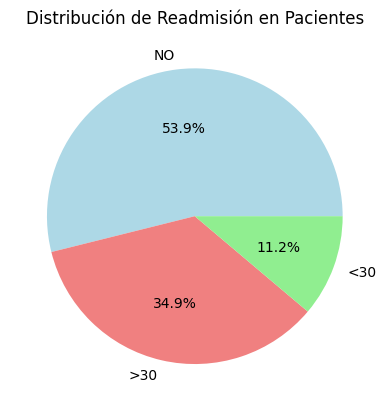

In [ ]:
df_diabetic_order['readmitted'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Distribución de Readmisión en Pacientes")
plt.ylabel("")  # Oculta la etiqueta de Y para mejor presentación
plt.show()


1).Más de la mitad de los pacientes NO son readmitidos.
Esto indica que la mayoría de los pacientes no regresan al hospital después de ser dados de alta, lo que podríamos interpretar como un indicador positivo de recuperación o de tratamientos efectivos.

2).El 34.9% de los pacientes son readmitidos después de 30 días (>30), esto representa una proporción significativa.
Esto sugiere que casi 1 de cada 3 pacientes regresa al hospital, lo que podría indicar problemas de seguimiento, manejo de enfermedades crónicas o condiciones que requieren hospitalización recurrente.

3).El 11.2% de los pacientes son readmitidos en menos de 30 días (<30).

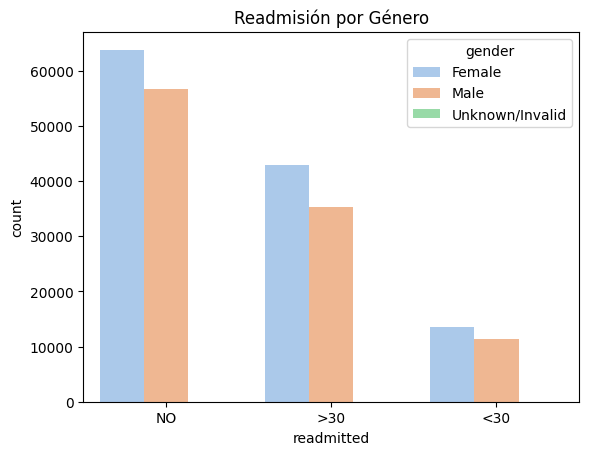

In [ ]:


sns.countplot(x="readmitted", hue="gender", data=df_diabetic_order, palette="pastel")
plt.title("Readmisión por Género")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df_diabetic_order["readmitted"], df_diabetic_order["admission_type"])
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"Chi2: {chi2}, p-valor: {p}")


Chi2: 604.7273822321633, p-valor: 1.0370547268926757e-121


**Conclusiones**

1). El p-valor es extremadamente pequeño, mucho menor que 0.05, lo que dice que hay una asociación significativa entre ambas variables.

2). El alto valor de Chi2 (604.73) indica que hay diferencias marcadas en la distribución de readmisión según el tipo de admisión.

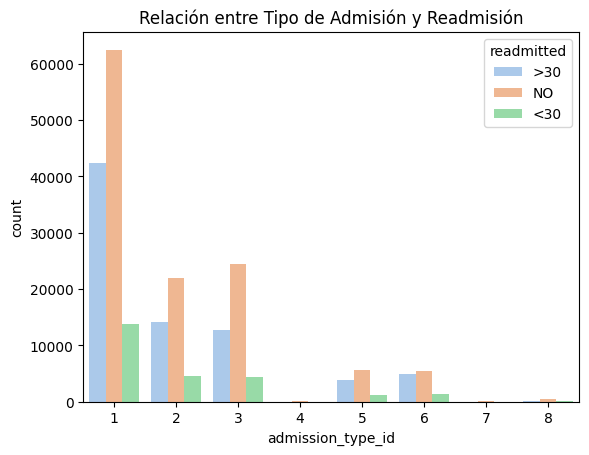

In [ ]:
sns.countplot(x="admission_type_id", hue="readmitted", data=df_diabetic_order, palette="pastel")
plt.title("Relación entre Tipo de Admisión y Readmisión")
plt.show()


In [ ]:

tabla_frecuencia = pd.crosstab(df_diabetic_order["admission_type"], df_diabetic_order["readmitted"])
print(tabla_frecuencia)


readmitted        <30    >30     NO
admission_type                     
Elective         4315  12659  24499
Emergency       13685  42408  62482
Newborn             2      4     15
Not Available    1081   3778   5631
Not Mapped         62    184    457
Trauma Center       0      0     48
Urgent           4519  14161  21859


**Conclusiones**

1). Las admisiones de emergencia (Emergency) tienen la mayor cantidad de readmisiones en menos de 30 días (<30) con 13,685 casos, lo que indica que este tipo de ingreso está fuertemente asociado con pacientes que requieren hospitalización repetida. Posiblemente, estos casos sean más críticos o inestables.

️2). Los tipos de admisión Newborn y Trauma Center tienen muy pocas o ninguna readmisión, lo que sugiere que estos tipos de ingresos pueden estar asociados con condiciones bien manejadas o pacientes que no requieren hospitalización repetida. Esto podría indicar que los recién nacidos y los pacientes de trauma son menos propensos a ser readmitidos en comparación con otros grupos.

In [ ]:
df_diabetic_order.groupby("readmitted")["time_in_hospital"].mean()

,time_in_hospital
readmitted,
<30,4.768842
>30,4.492799
NO,4.250851


**Conclusiones**

1). Los pacientes que fueron readmitidos en menos de 30 días (<30) tienen la estancia hospitalaria más larga (4.77 días en promedio).

Esto indica que los casos más graves o complicados requieren más tiempo de hospitalización y, al mismo tiempo, tienen una mayor probabilidad de volver al hospital pronto.

2). Los pacientes que fueron readmitidos después de 30 días (>30) tienen una estancia intermedia (4.49 días en promedio).

Podemos inferir que algunos pacientes pueden haber tenido problemas posteriores a su hospitalización, pero no tan urgentes como para requerir una readmisión inmediata.

3). Los pacientes que NO fueron readmitidos (NO) tienen la menor estancia hospitalaria (4.25 días en promedio).

Esto podría significar que los casos menos graves requieren menos tiempo de hospitalización y tienen menos probabilidades de ser readmitidos.

**Analisis para el target**

El objetivo del modelo es predecir si un paciente será readmitido en el hospital dentro de 30 días después del alta. Para trducir esto al lenguaje del modelo:

- Los registros con readmitted = '<30' se clasifican como 1 (readmisión temprana).

- Los demás casos (>30 o NO) se clasifican como 0 (no hubo readmisión temprana).

In [ ]:
#Funcion 5: mapeo del target

def map_target(df):
    df['target'] = df['readmitted'].map({
        '<30': 1,    # Caso positivo (readmisión temprana)
        '>30': 0,    # Caso negativo
        'NO': 0      # Caso negativo
    })

    return df

df_diabetic_order = map_target(df_diabetic_order)



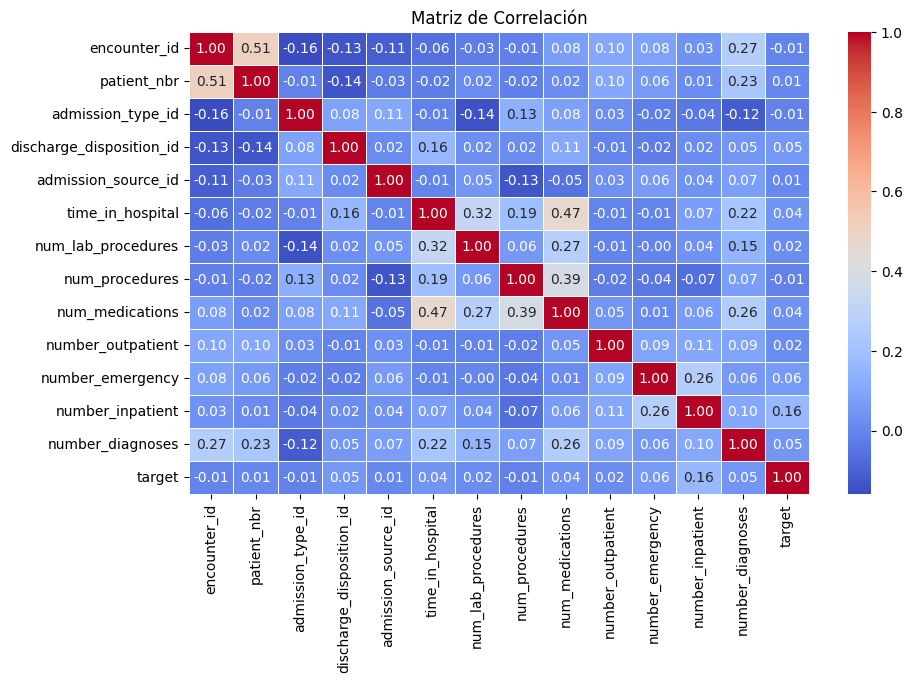

In [ ]:
df_corr = df_diabetic_order.corr(numeric_only=True)
df_corr['target'].sort_values(ascending=False)

# Crear la figura
plt.figure(figsize=(10, 6))

# Dibujar el heatmap
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación")

# Mostrar la gráfica
plt.show()

<ipython-input-42-b0b17a49e41d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


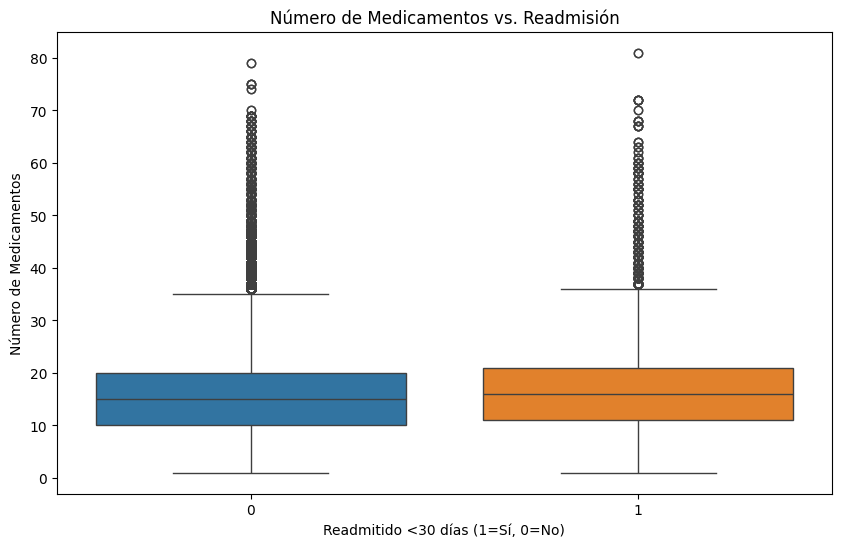

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='target',
    y='num_medications',
    data=df_diabetic_order,
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Número de Medicamentos vs. Readmisión')
plt.xlabel('Readmitido <30 días (1=Sí, 0=No)')
plt.ylabel('Número de Medicamentos')
plt.show()

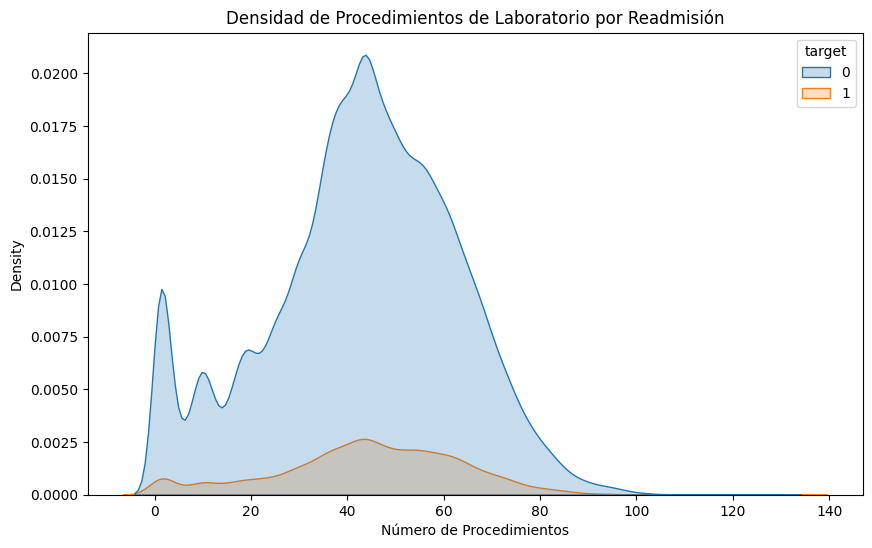

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_diabetic_order,
    x='num_lab_procedures',
    hue='target',
    fill=True,
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Densidad de Procedimientos de Laboratorio por Readmisión')
plt.xlabel('Número de Procedimientos')
plt.show()

**Conclusiones:**

1). la mayor densidad de pacientes readmitidos en menos de 30 días (target = 1) presentan un número aproximado de 45 procedimientos.

2). Vemos que muchos de los pacientes no readmitidos en un rango menor a 30 días no se realizan procedimientos.

3). Al superponer las 2 distribuciones vemos claramente que la variable target esta desbalanceada


#  Feature Engineering  #

In [ ]:
#contamos valores unicos de la columna race  incluyendo nulos
df_diabetic_order['race'].value_counts(dropna=False)

,count
race,
Caucasian,167172
AfricanAmerican,42246
?,4997
Hispanic,4423
Other,3291
Asian,1402


In [ ]:
#Funcion 6:comvertir ? a Other de la columna race para que el modelo lo pueda interpretar mejor
def replace_race(df):
    df['race'] = df['race'].replace('?', 'Other')

    return df

df_diabetic_order = replace_race(df_diabetic_order)

In [ ]:
#contamos valores unicos de la columna gender incluyendo nulos
df_diabetic_order['gender'].value_counts(dropna=False)

,count
gender,
Female,120149
Male,103375
Unknown/Invalid,7


Teniendo en cuenta que no existe una categoría 'Otro' o 'NAN' en el campo de género y solo hay 3 registros con el valor desconocido/Inválido, decidi excluir estos registros del conjunto de datos.

In [ ]:
#Eliminando registros con valores nulos y 'Desconocido/Inválido
#Funcion 7:

def exclude_unknown_and_NaN(df):

    exclude_indexes = df[df['gender'] == 'Unknown/Invalid'].index.tolist()

    exclude_indexes = exclude_indexes + df[df['diag_1'].isna()].index.tolist()

    exclude_indexes = exclude_indexes + df[df['diag_2'].isna()].index.tolist()

    exclude_indexes = exclude_indexes + df[df['diag_3'].isna()].index.tolist()

    required_indexes = [index for index in df.index.tolist() if index not in list(set(exclude_indexes))]

    df = df.loc[required_indexes]

    return df

df_diabetic_order = exclude_unknown_and_NaN(df_diabetic_order)

In [ ]:
#analizamos las columnas que generaron sospecha al inicio del analisis por cantidad de valores faltantes
#Analizar = ['payer_code','medical_specialty','citoglipton','examide','glimepiride-pioglitazone','weight']
df_diabetic_order['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [ ]:
df_diabetic_order['weight'].value_counts()

,count
weight,
?,216503
[75-100),2932
[50-75),1965
[100-125),1371
[125-150),325
[25-50),213
[0-25),110
[150-175),73
[175-200),26


In [ ]:
#Eliminamos las columnas con gran cantidad de valores faltantes o con un único valor único como '?' , NaN , No.
#Funcion 8: Elimina las columnas con valores faltantes y que no aporten mucha informaacion al modelo.

def drop_columns(df):
    df = df.drop(['weight','payer_code','medical_specialty','examide', 'citoglipton', 'glimepiride-pioglitazone'], axis = 1)

    return df

df_diabetic_order = drop_columns(df_diabetic_order)


In [ ]:
#Vamos a categorizar algunas de las columnas de tipo objeto y vamos a tnansforma algunas categorias a valores números enteros.
#Funcion 9:

def transform_and_categorize(df):
  df['race'] = df['race'].astype('category').cat.codes

  df['gender'] = df['gender'].replace('Male', 1)
  df['gender'] = df['gender'].replace('Female', 0)

  df['age'] = df['age'].replace('[0-10)', 0)
  df['age'] = df['age'].replace('[10-20)', 1)
  df['age'] = df['age'].replace('[20-30)', 2)
  df['age'] = df['age'].replace('[30-40)', 3)
  df['age'] = df['age'].replace('[40-50)', 4)
  df['age'] = df['age'].replace('[50-60)', 5)
  df['age'] = df['age'].replace('[60-70)', 6)
  df['age'] = df['age'].replace('[70-80)', 7)
  df['age'] = df['age'].replace('[80-90)', 8)
  df['age'] = df['age'].replace('[90-100)', 9)

  df['diag_1'] = df['diag_1'].astype('category').cat.codes
  df['diag_2'] = df['diag_2'].astype('category').cat.codes
  df['diag_3'] = df['diag_3'].astype('category').cat.codes

  return df

df_diabetic_order = transform_and_categorize(df_diabetic_order)


<ipython-input-48-95f808765838>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
<ipython-input-48-95f808765838>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('[90-100)', 9)


Ahora vamos a realizar la categorización de las pruebas de laboratorio tanto A1Cresult(Resultado de la prueba de A1c ) como de max_glu_serum (Resultado de la prueba de glucosa en suero)

**mg/dL -> (miligramos por decilitro)**

**Analisis para la A1Cresult:**
La prueba A1C (o hemoglobina glicosilada) mide el nivel promedio de glucosa en sangre durante los últimos 2-3 meses. Es clave para diagnosticar y controlar la diabetes.
Los valores indican el porcentaje de hemoglobina cubierta por glucosa.

- **'>8'	->   2:**
Para diabetes mal controlada. Riesgo alto de complicaciones.
El rango de glucosa promedio en mg/dL seri ≈ 200 o más

- **'>7'	 ->   2:**
Para diabetes moderada. Niveles elevados que requieren ajuste de tratamiento.
El rango de glucosa promedio en mg/dL seri ≈ 150-200

- **'Norm'  ->	1:**
Normal. Paciente no diabético o diabetes bien controlada.
El rango de glucosa promedio en mg/dL seri menos de 140

- **'None'	-> 0:**
No se realizó la prueba o datos faltantes, N/A.


In [ ]:
#Funcion 10: procesar los datos de la columna A1Cresult
def process_A1Cresult(df):

  df['A1Cresult'] = df['A1Cresult'].replace('>7', 2)
  df['A1Cresult'] = df['A1Cresult'].replace('>8', 2)
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 1)
  df['A1Cresult'] = df['A1Cresult'].fillna(0)

  return df

df_diabetic_order = process_A1Cresult(df_diabetic_order)

<ipython-input-49-37926f3d831c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 1)


**Analisis para max_glu_serum:** la prueba de glucosa sérica máxima mide el nivel máximo de glucosa en sangre en un momento específico. Es clave para diagnosticar hiperglucemia aguda o controlar crisis diabéticas.
Los valores indican si el nivel de glucosa está elevado (>200 o >300 mg/dL), es normal, o si no se midió.

- **>300	2:** Hiperglucemia grave. Riesgo de cetoacidosis diabética o coma hiperglucémico. Nivel de Glucosa en mg/dL  ≥300

- **>200	2:** Hiperglucemia moderada. Requiere intervención médica. Nivel de Glucosa en mg/dL  200–300

- **Norm	1:** Normal. Glucosa dentro de rangos saludables.Nivel de Glucosa en mg/dL <140 (en ayunas) o <180 (postprandial)

- **None	0:** No se realizó la prueba o datos faltantes.	N/A

In [ ]:
#Funcion 11: procesar los datos de la columna _max_glu_serum
def process_max_glu_serum(df):

  df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 2)
  df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 2)
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 1)
  df['max_glu_serum'] = df['max_glu_serum'].fillna(0)

  return df


df_diabetic_order = process_max_glu_serum(df_diabetic_order)

<ipython-input-50-8abc8cf71079>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 1)


**Analisis para los medicamentos:**

Las columnas de medicamentos son clave porque revelan el tratamiento recibido por los pacientes, lo que directamente impacta en su control de glucosa y riesgo de complicaciones. Al transformarlas a formato binario (1=recibió el medicamento / 0=no lo recibió), se identifica fácilmente qué fármacos están asociados a mayores readmisiones hospitalarias y permitiendo optimizar la generalizacion de informacion para la face de ML.


**Relación con la predicción de readmisiones**
- **Ejemplo 1:** Pacientes con insulina=1 podrían indicar diabetes más severa pór lo tanto mayor riesgo de readmisión

- **Ejemplo 2:** metformina=1 podría correlacionarse con mejor manejo glucémico
 pór lo tanto menor riesgo.

In [ ]:
#Lista para procesar medicamentos
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
'tolazamide','metformin-pioglitazone', 'metformin-rosiglitazone', 'glipizide-metformin','troglitazone',
'tolbutamide', 'acetohexamide']

In [ ]:
#Funcion 12: procesar o binarizar los datos de las columnas que llevan el nombre de algun medicamento
def process_medicamentos(df):

  for col in medicamentos:
      df[col] = df[col].replace('No', 0)
      df[col] = df[col].replace('Steady', 1)
      df[col] = df[col].replace('Up', 1)
      df[col] = df[col].replace('Down', 1)

  return df

df_diabetic_order = process_medicamentos(df_diabetic_order)

<ipython-input-51-b23d5962167e>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Down', 1)
<ipython-input-51-b23d5962167e>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Up', 1)
<ipython-input-51-b23d5962167e>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

**Procesamiento de otras columnas o caracteristicas**

In [ ]:
#Funcion 13:procesar o binarizar los datos de la columna change
def process_change(df):

    df['change'] = df['change'].replace('Ch', 1)
    df['change'] = df['change'].replace('No', 0)

    return df

df_diabetic_order = process_change(df_diabetic_order)

<ipython-input-52-bc7be254e3f0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)


In [ ]:
#Funcion 14:procesar o binarizar los datos de la columna diabetesMed
def process_diabetesMed(df):

    df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
    df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

    return df

df_diabetic_order = process_diabetesMed(df_diabetic_order)

<ipython-input-53-c86f04b2f95e>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].replace('No', 0)


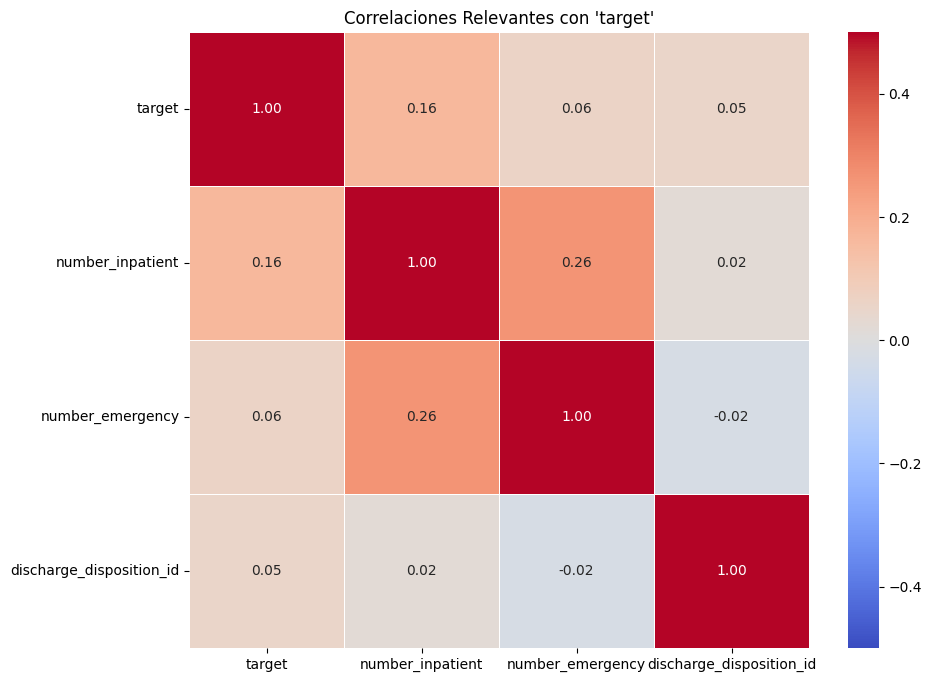

In [ ]:
# Calcular correlaciones
df_corr = df_diabetic_order.corr(numeric_only=True)

# Filtrar variables con correlación mínima (ej: >0.05)
target_corr = df_corr['target'].sort_values(ascending=False)
relevant_cols = target_corr[abs(target_corr) > 0.05].index.tolist()

# Heatmap filtrado
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_corr.loc[relevant_cols, relevant_cols],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-0.5,
    vmax=0.5  # Ajusta el rango para mejor contraste
)
plt.title("Correlaciones Relevantes con 'target'")
plt.show()

# Modelamiento predictivo #

In [ ]:
ML_training_features = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'diag_1',
            'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult','race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
            'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed','target']

In [ ]:
#Implementamos la funcion para ordenar el df_final
df_final = ordenar_df(df_diabetic_order,ML_training_features)
df_final

,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,race,gender,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target
0,6,25,1,124,650,670,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,7,143,79,121,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,1,1,7,454,78,767,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,7,554,97,248,0.0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,1,7,54,24,86,0.0,0.0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223526,3,1,1,433,418,66,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223527,3,1,1,22,144,381,0.0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
223528,1,11,7,236,133,407,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223529,1,18,7,120,272,246,0.0,0.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
df_final.isnull().sum().sort_values(ascending = False).head(5)

,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
diag_1,0
diag_2,0


In [ ]:
# Guardar data preprocesada y transformada en archivos .csv
df_final.to_csv('diabetic_data_preprocessed.csv')
df_admission_type_id.to_csv('IDS_admission_type_id__preprocessed.csv')
df_discharge_disposition_id.to_csv('IDS_discharge_disposition_id_preprocessed.csv')
df_admission_source_id.to_csv('IDS_admission_source_id_preprocessed.csv')


In [ ]:
# Guardar data preprocesada y transformada en archivos .xslx
df_final.to_excel('diabetic_data_preprocessedEx.xlsx', index=False)

In [ ]:
x = df_final.drop('target', axis=1)
y = df_final['target']

In [ ]:
x

,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,race,gender,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,6,25,1,124,650,670,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,7,143,79,121,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,1,1,7,454,78,767,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,7,554,97,248,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,1,1,7,54,24,86,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223526,3,1,1,433,418,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223527,3,1,1,22,144,381,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223528,1,11,7,236,133,407,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223529,1,18,7,120,272,246,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
223526,0
223527,1
223528,0
223529,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3, random_state=42)

**MODELO 1 ->  catboost**




In [ ]:
from catboost import CatBoostClassifier
from sklearn.utils import class_weight



clases = np.unique(y_train)

# Calcula los pesos de las clases utilizando la estrategia 'balanced'
pesos = class_weight.compute_class_weight('balanced', classes=clases, y=y_train)
pesos_dict = dict(zip(clases, pesos))


Modelo1 = CatBoostClassifier(random_state = 123,
                                verbose = False,
                                max_depth = 6,
                                class_weights=pesos_dict) # Inplemento el diccionario de pesos para el balanceo


Modelo1.fit(x_train,y_train)

In [ ]:
#Validacion cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
cv = cross_validate(Modelo1, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])

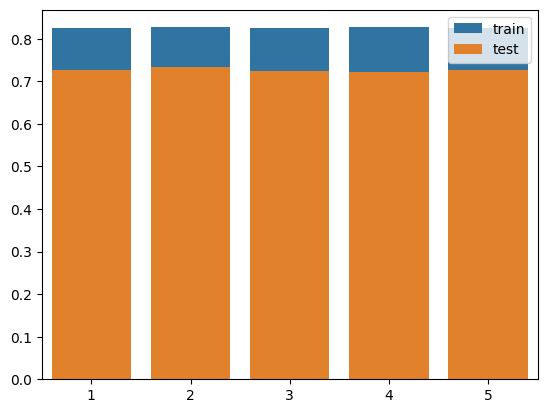

In [ ]:
sns.barplot( x = np.arange(1,6), y = cv['train_roc_auc'] , label = 'train')
sns.barplot( x = np.arange(1,6), y = cv['test_roc_auc'] , label = 'test')
plt.show()

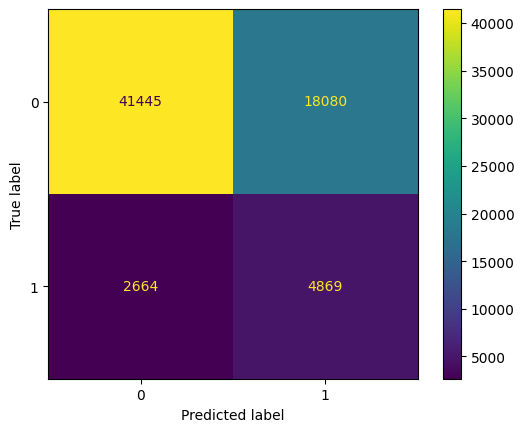

accuracy_score:  0.6906558501595633
sensivilidad:  0.6463560334528077
especificidad:  0.6962620747585049
roc_auc_score:  0.6713090541056562


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

threshold = 0.5
preds = np.where(Modelo1.predict_proba(x_test)[:,1]>threshold,1,0)

cm = confusion_matrix(y_test,preds)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds))
print('sensivilidad: ',recall_score(y_test,preds,pos_label=1))
print('especificidad: ',recall_score(y_test,preds,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds))

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.7 MB/s eta 0:00:00


In [ ]:
#Optimizamos los hiper parametros del modelo CatBoost
import optuna
from sklearn.utils import class_weight


def objective(trial):
    param = {

        "iterations": trial.suggest_int("iterations", 100, 500, step=50), # Reducido el máximo
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 0.4), # Rango más centrado
        "depth": trial.suggest_int("depth", 4, 8), # Rango un poco más estrecho
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15), # Límite superior más bajo
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5), # Rango más ajustado
        "random_strength": trial.suggest_float("random_strength", 0.3, 0.8), # Rango más centrado
        "border_count": trial.suggest_int("border_count", 64, 192) # Rango más estrecho


            }

    kf = KFold(n_splits=5)

    # Calcular los pesos de las clases para el dataset de entrenamiento
    clases = np.unique(y_train)
    pesos = class_weight.compute_class_weight('balanced', classes=clases, y=y_train)
    pesos_dict = dict(zip(clases, pesos))

    Modelo_Optimizado1 = CatBoostClassifier(random_state = 123,
                                            verbose = False,
                                            class_weights=pesos_dict, # Agrega el parámetro class_weights
                                            **param)

    cv = cross_validate(Modelo_Optimizado1, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])
    auc = np.mean(cv['test_roc_auc'])
    dispersion = np.std(cv['test_roc_auc'])
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-03-26 02:29:00,339] A new study created in memory with name: no-name-f954ca56-5b88-4343-9002-3d4875639ec3
[I 2025-03-26 02:29:54,728] Trial 0 finished with value: 0.6315435889275804 and parameters: {'iterations': 500, 'colsample_bylevel': 0.30424532040940144, 'depth': 4, 'learning_rate': 0.01648581785875355, 'l2_leaf_reg': 1.712153584969744, 'random_strength': 0.43541036297371305, 'border_count': 120}. Best is trial 0 with value: 0.6315435889275804.
[I 2025-03-26 02:30:55,454] Trial 1 finished with value: 0.7284635363658738 and parameters: {'iterations': 350, 'colsample_bylevel': 0.2587674361041976, 'depth': 8, 'learning_rate': 0.10071999976201289, 'l2_leaf_reg': 2.6955033037364253, 'random_strength': 0.3379075009700987, 'border_count': 85}. Best is trial 1 with value: 0.7284635363658738.
[I 2025-03-26 02:32:03,663] Trial 2 finished with value: 0.7152499907260731 and parameters: {'iterations': 450, 'colsample_bylevel': 0.2402908771584293, 'depth': 7, 'learning_rate': 0.11931365

In [ ]:
study.best_params

{'iterations': 500,
 'colsample_bylevel': 0.3881423909784964,
 'depth': 8,
 'learning_rate': 0.08358079145374024,
 'l2_leaf_reg': 2.35454107600547,
 'random_strength': 0.4035976727570523,
 'border_count': 109}

In [ ]:
study.best_trial

FrozenTrial(number=12, state=1, values=[0.7443176849545783], datetime_start=datetime.datetime(2025, 3, 26, 2, 38, 59, 255589), datetime_complete=datetime.datetime(2025, 3, 26, 2, 40, 27, 937312), params={'iterations': 500, 'colsample_bylevel': 0.3881423909784964, 'depth': 8, 'learning_rate': 0.08358079145374024, 'l2_leaf_reg': 2.35454107600547, 'random_strength': 0.4035976727570523, 'border_count': 109}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=50), 'colsample_bylevel': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None), 'l2_leaf_reg': FloatDistribution(high=5.0, log=False, low=1.0, step=None), 'random_strength': FloatDistribution(high=0.8, log=False, low=0.3, step=None), 'border_count': IntDistribution(high=192, log=False, low=64, step=1)}, trial_

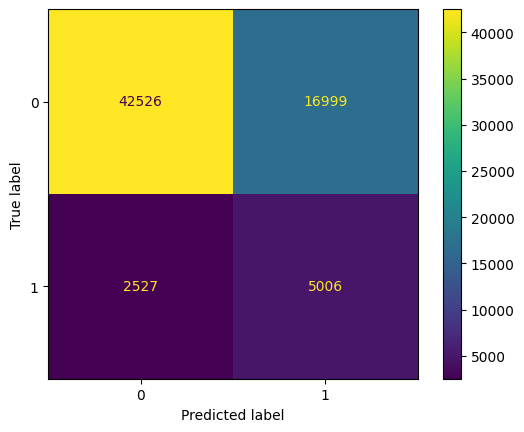

accuracy_score:  0.7088192311133645
sensivilidad:  0.6645426788795964
especificidad:  0.714422511549769
roc_auc_score:  0.6894825952146828


In [ ]:
#Reemplazamos los el universo de hiperparametros optimizados para entrenar de nuevo el modelo
param = {'iterations': 500,
        'colsample_bylevel': 0.3881423909784964,
        'depth': 8,
        'learning_rate': 0.08358079145374024,
        'l2_leaf_reg': 2.35454107600547,
        'random_strength': 0.4035976727570523,
        'border_count': 109}


Modelo_Optimizado1 = CatBoostClassifier(random_state = 123,
                                        verbose = False,
                                        class_weights=pesos_dict, # Agrega el parámetro class_weights
                                        **param)

Modelo_Optimizado1.fit(x_train,y_train)

threshold = 0.5
preds = np.where(Modelo_Optimizado1.predict_proba(x_test)[:,1]>threshold,1,0)

cm = confusion_matrix(y_test,preds)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds))
print('sensivilidad: ',recall_score(y_test,preds,pos_label=1))
print('especificidad: ',recall_score(y_test,preds,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds))



In [ ]:
import pickle

#Nombre del archivo donde guardarás el modelo
nombre_archivo = 'modelo_catboost.pkl'

# Abre un archivo en modo escritura binaria ('wb')
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(Modelo_Optimizado1, archivo)

print(f"Modelo CatBoost guardado exitosamente en el archivo: {nombre_archivo}")


Modelo CatBoost guardado exitosamente en el archivo: modelo_catboost.pkl


**MODELO 2 ->   LGBM**

In [ ]:
import lightgbm as lgb

pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

Modelo2 = lgb.LGBMClassifier(
    random_state=123,
    objective='binary',
    scale_pos_weight=pos_weight,  # Peso ajustado
    n_estimators=100,
    learning_rate=0.1
)
Modelo2.fit(x_train, y_train)  # Datos originales (sin SMOTE)

[LightGBM] [Info] Number of positive: 17411, number of negative: 139055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 156466, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111277 -> initscore=-2.077767
[LightGBM] [Info] Start training from score -2.077767


LGBMClassifier(objective='binary', random_state=123,
               scale_pos_weight=7.986617655505141)

In [ ]:
#Validacion cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf2 = KFold(n_splits=5)
cv2 = cross_validate(Modelo2, x_train, y_train, cv = kf2, return_train_score = True , scoring = ['roc_auc'])


[LightGBM] [Info] Number of positive: 13786, number of negative: 111386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 125172, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110136 -> initscore=-2.089348
[LightGBM] [Info] Start training from score -2.089348
[LightGBM] [Info] Number of positive: 13943, number of negative: 111230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 125173, number of used features: 27
[LightGBM] [Info

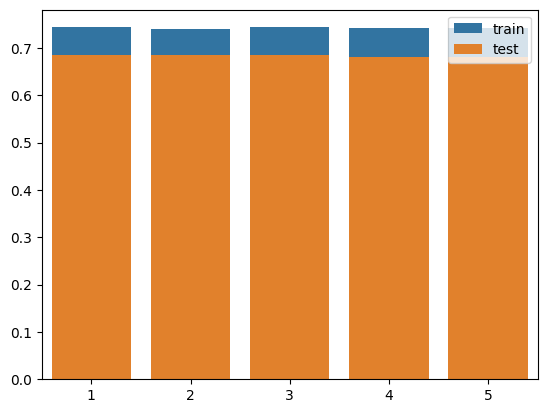

In [ ]:
sns.barplot( x = np.arange(1,6), y = cv2['train_roc_auc'] , label = 'train')
sns.barplot( x = np.arange(1,6), y = cv2['test_roc_auc'] , label = 'test')
plt.show()


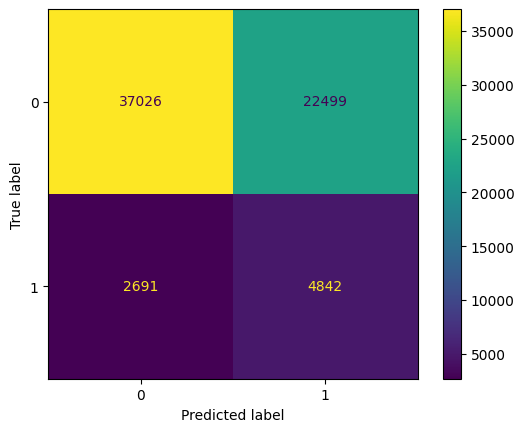

accuracy_score:  0.6243550359390379
sensivilidad:  0.6427718040621266
especificidad:  0.6220243595128098
roc_auc_score:  0.6323980817874681


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

threshold2 = 0.5
preds2 = np.where(Modelo2.predict_proba(x_test)[:,1]>threshold2,1,0)

cm2 = confusion_matrix(y_test,preds2)
diplay2 = ConfusionMatrixDisplay(cm2)
diplay2.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds2))
print('sensivilidad: ',recall_score(y_test,preds2,pos_label=1))
print('especificidad: ',recall_score(y_test,preds2,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds2))

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Calcular el peso de la clase positiva ANTES de la optimización (fuera de la función objective)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100, step=10),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100, step=10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),

    }


    model = LGBMClassifier(
        objective="binary",
        random_state=123,
        scale_pos_weight=pos_weight,  # Peso fijo aquí
        **params
    )


    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = cross_validate(model,x_train,y_train,cv=kf,scoring="roc_auc",n_jobs=-1)

    return np.mean(cv_results["test_score"])

# Optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Ajusta el número de trials

[I 2025-03-26 05:23:55,292] A new study created in memory with name: no-name-a4682438-9393-4fdc-8f23-7473adb3038e
[I 2025-03-26 05:24:39,584] Trial 0 finished with value: 0.7238005616319654 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.08230794989179184, 'num_leaves': 100, 'min_child_samples': 50, 'subsample': 0.9730886858331993, 'colsample_bytree': 0.6807158505784265, 'reg_alpha': 0.2638190797390555, 'reg_lambda': 0.8875912146425032}. Best is trial 0 with value: 0.7238005616319654.
[I 2025-03-26 05:25:09,507] Trial 1 finished with value: 0.6885887276171321 and parameters: {'n_estimators': 450, 'max_depth': 6, 'learning_rate': 0.03411869303096033, 'num_leaves': 30, 'min_child_samples': 10, 'subsample': 0.9541066869255017, 'colsample_bytree': 0.7775958011867825, 'reg_alpha': 0.03686975366505307, 'reg_lambda': 0.08364393976071738}. Best is trial 0 with value: 0.7238005616319654.
[I 2025-03-26 05:25:27,955] Trial 2 finished with value: 0.6494020295794447 and par

In [ ]:
study.best_params

{'n_estimators': 350,
 'max_depth': 9,
 'learning_rate': 0.19392185935788228,
 'num_leaves': 80,
 'min_child_samples': 40,
 'subsample': 0.6779498970913764,
 'colsample_bytree': 0.6042380264170726,
 'reg_alpha': 0.28257418564117426,
 'reg_lambda': 0.6180344768508916}

In [ ]:
study.best_trial

FrozenTrial(number=13, state=1, values=[0.797305257002864], datetime_start=datetime.datetime(2025, 3, 26, 5, 29, 54, 961053), datetime_complete=datetime.datetime(2025, 3, 26, 5, 30, 26, 530131), params={'n_estimators': 350, 'max_depth': 9, 'learning_rate': 0.19392185935788228, 'num_leaves': 80, 'min_child_samples': 40, 'subsample': 0.6779498970913764, 'colsample_bytree': 0.6042380264170726, 'reg_alpha': 0.28257418564117426, 'reg_lambda': 0.6180344768508916}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=50), 'max_depth': IntDistribution(high=12, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.2, log=True, low=0.01, step=None), 'num_leaves': IntDistribution(high=100, log=False, low=20, step=10), 'min_child_samples': IntDistribution(high=100, log=False, low=10, step=10), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistributi

[LightGBM] [Info] Number of positive: 17411, number of negative: 139055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 156466, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111277 -> initscore=-2.077767
[LightGBM] [Info] Start training from score -2.077767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

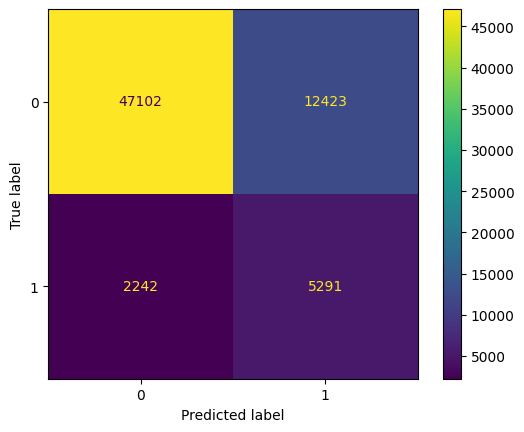

accuracy_score:  0.7813087178263592
sensivilidad:  0.7023762113367849
especificidad:  0.7912977740445191
roc_auc_score:  0.746836992690652


In [ ]:
params = {'n_estimators': 350,
              'max_depth': 9,
              'learning_rate': 0.19392185935788228,
              'num_leaves': 80,
              'min_child_samples': 40,
              'subsample': 0.6779498970913764,
              'colsample_bytree': 0.6042380264170726,
              'reg_alpha': 0.28257418564117426,
              'reg_lambda': 0.6180344768508916}


Modelo_Optimizado2 = LGBMClassifier(
      objective="binary",
      random_state=123,
      scale_pos_weight=pos_weight,
      **params
      )

Modelo_Optimizado2.fit(x_train, y_train)


threshold2 = 0.5
preds2 = np.where(Modelo_Optimizado2.predict_proba(x_test)[:,1]>threshold2,1,0)

cm2 = confusion_matrix(y_test,preds2)
diplay2 = ConfusionMatrixDisplay(cm2)
diplay2.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds2))
print('sensivilidad: ',recall_score(y_test,preds2,pos_label=1))
print('especificidad: ',recall_score(y_test,preds2,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds2))


In [ ]:
import pickle

#Nombre del archivo donde guardarás el modelo
nombre_archivo = 'modelo_LGBMClassifier.pkl'

# Abre un archivo en modo escritura binaria ('wb')
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(Modelo_Optimizado2, archivo)

print(f"Modelo LGBMClassifier guardado exitosamente en el archivo: {nombre_archivo}")

Modelo CatBoost guardado exitosamente en el archivo: modelo_LGBMClassifier.pkl


**MODELO 3 ->   RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Modelo base con parámetros por defecto
Modelo3 =  RandomForestClassifier(
    class_weight='balanced',
    random_state=123,
    n_estimators=100,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,

)

Modelo3.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=123)

In [ ]:
#Validacion cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf3 = KFold(n_splits=5)
cv3 = cross_validate(Modelo3, x_train, y_train, cv = kf3, return_train_score = True , scoring = ['roc_auc'])

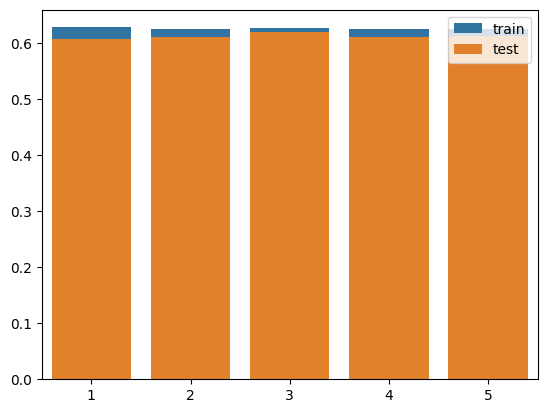

In [ ]:
sns.barplot( x = np.arange(1,6), y = cv3['train_roc_auc'] , label = 'train')
sns.barplot( x = np.arange(1,6), y = cv3['test_roc_auc'] , label = 'test')
plt.show()

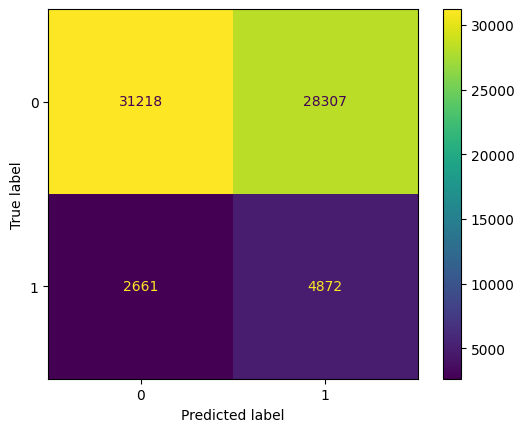

accuracy_score:  0.5381908198872618
sensivilidad:  0.6467542811628834
especificidad:  0.5244519109617808
roc_auc_score:  0.5856030960623321


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

threshold3 = 0.5
preds3 = np.where(Modelo3.predict_proba(x_test)[:,1]>threshold3,1,0)

cm3 = confusion_matrix(y_test,preds3)
diplay3 = ConfusionMatrixDisplay(cm3)
diplay3.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds3))
print('sensivilidad: ',recall_score(y_test,preds3,pos_label=1))
print('especificidad: ',recall_score(y_test,preds3,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds3))

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced'  # Manejo automático de desbalanceo
    }

    model = RandomForestClassifier(random_state=123, **params)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2025-03-26 06:12:51,833] A new study created in memory with name: no-name-f180f48d-021f-420e-bd43-cbfdc32fccb4
[I 2025-03-26 06:14:40,418] Trial 0 finished with value: 0.6042905810511645 and parameters: {'n_estimators': 326, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6042905810511645.
[I 2025-03-26 06:16:30,651] Trial 1 finished with value: 0.8236834100640463 and parameters: {'n_estimators': 138, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8236834100640463.
[I 2025-03-26 06:18:35,887] Trial 2 finished with value: 0.6235830841373879 and parameters: {'n_estimators': 273, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8236834100640463.
[I 2025-03-26 06:25:04,256] Trial 3 finished with value: 0.804821865775869

KeyboardInterrupt: 

In [ ]:
study.best_params

{'n_estimators': 125,
 'max_depth': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': None,
 'bootstrap': True}

In [ ]:
study.best_trial

FrozenTrial(number=7, state=1, values=[0.8484525726726595], datetime_start=datetime.datetime(2025, 3, 26, 6, 34, 37, 581708), datetime_complete=datetime.datetime(2025, 3, 26, 6, 41, 42, 312372), params={'n_estimators': 125, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'bootstrap': CategoricalDistribution(choices=(True, False))}, trial_id=7, value=None)

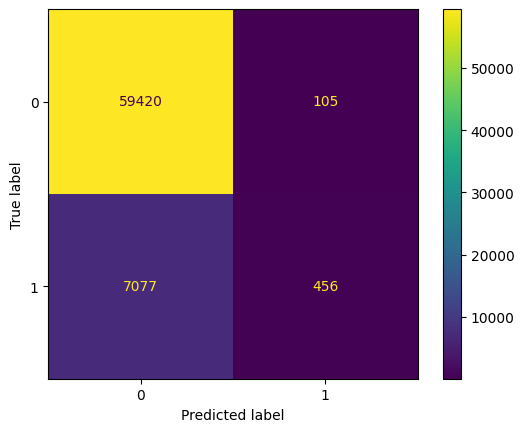

accuracy_score:  0.8928986847206896
sensivilidad:  0.06053365193150139
especificidad:  0.9982360352792944
roc_auc_score:  0.529384843605398


In [ ]:
params = {'n_estimators': 125,
          'max_depth': 25,
          'min_samples_split': 10,
          'min_samples_leaf': 6,
          'max_features': None,
          'bootstrap': True}


Modelo_Optimizado3 = RandomForestClassifier(random_state=123, **params)

Modelo_Optimizado3.fit(x_train, y_train)


threshold3 = 0.5
preds3 = np.where(Modelo_Optimizado3.predict_proba(x_test)[:,1]>threshold3,1,0)

cm3 = confusion_matrix(y_test,preds3)
diplay3 = ConfusionMatrixDisplay(cm3)
diplay3.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds3))
print('sensivilidad: ',recall_score(y_test,preds3,pos_label=1))
print('especificidad: ',recall_score(y_test,preds3,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds3))

In [ ]:
import pickle

#Nombre del archivo donde guardarás el modelo
nombre_archivo = 'modelo_RandomForestClassifier.pkl'

# Abre un archivo en modo escritura binaria ('wb')
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(Modelo_Optimizado3, archivo)

print(f"Modelo RandomForestClassifier guardado exitosamente en el archivo: {nombre_archivo}")

Modelo RandomForestClassifier guardado exitosamente en el archivo: modelo_RandomForestClassifier.pkl


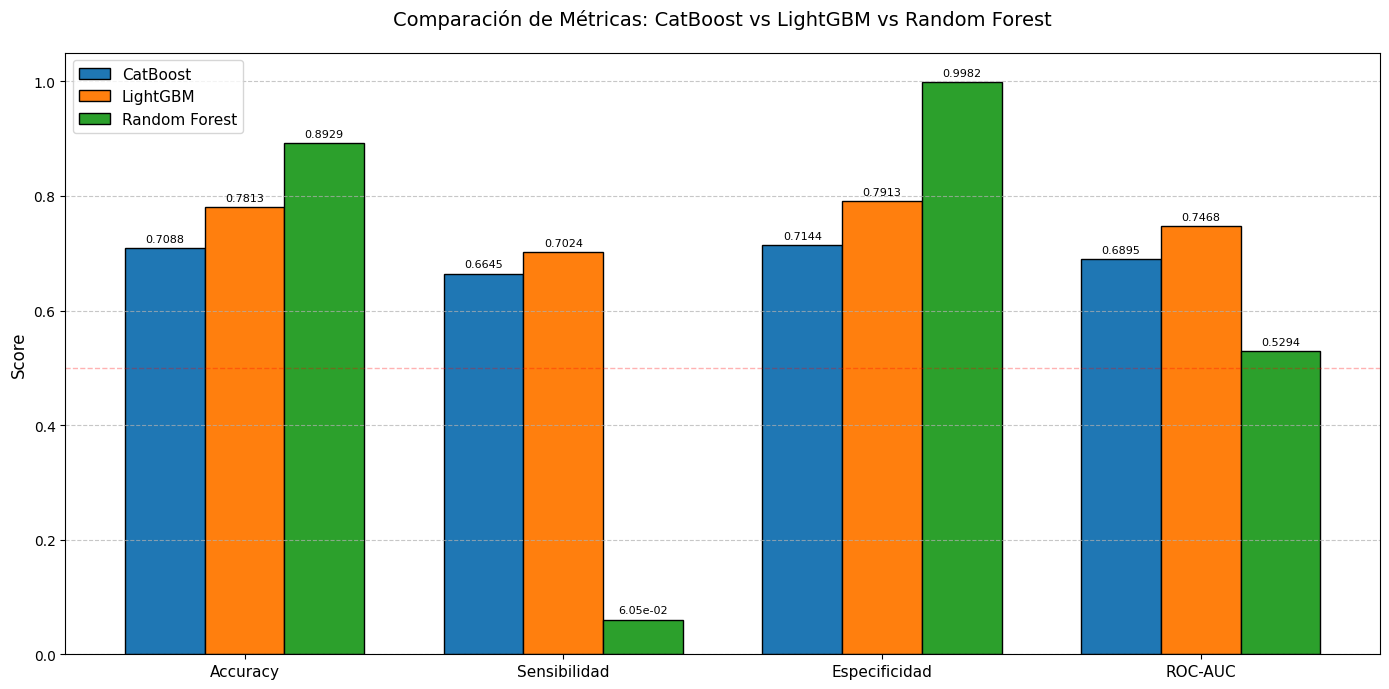

In [ ]:

# Datos de los modelos
modelos = ['CatBoost', 'LightGBM', 'Random Forest']
metricas = ['Accuracy', 'Sensibilidad', 'Especificidad', 'ROC-AUC']

# Valores de las métricas para cada modelo (en el orden de la lista 'metricas')
catboost_vals = [0.7088, 0.6645, 0.7144, 0.6895]
lightgbm_vals = [0.7813, 0.7024, 0.7913, 0.7468]
randomforest_vals = [0.8929, 0.0605, 0.9982, 0.5294]  # ¡Notar la sensibilidad extremadamente baja!

# Configuración del gráfico
x = np.arange(len(metricas))  # Posiciones de las etiquetas
width = 0.25  # Ancho de las barras (reducido para 3 modelos)

fig, ax = plt.subplots(figsize=(14, 7))

# Barras para cada modelo
rects1 = ax.bar(x - width, catboost_vals, width, label='CatBoost', color='#1f77b4', edgecolor='black')
rects2 = ax.bar(x, lightgbm_vals, width, label='LightGBM', color='#ff7f0e', edgecolor='black')
rects3 = ax.bar(x + width, randomforest_vals, width, label='Random Forest', color='#2ca02c', edgecolor='black')

# Personalización
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Métricas: CatBoost vs LightGBM vs Random Forest', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metricas, fontsize=11)
ax.legend(loc='upper left', fontsize=11)
ax.set_ylim(0, 1.05)  # Ajustado para acomodar valores altos de especificidad
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Función para añadir etiquetas con formato condicional (por la sensibilidad muy baja)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Formatear valores muy pequeños en notación científica
        if height < 0.1:
            text = f'{height:.2e}'
        else:
            text = f'{height:.4f}'
        ax.annotate(text,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Añadir línea horizontal para destacar el 0.5 (umbral aleatorio en ROC-AUC)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()

**Conclusiones**

1). LightGBM muestra el mejor rendimiento general: De los tres modelos, LightGBM presenta los valores más altos en Accuracy (0.7813), Sensibilidad (0.7024), Especificidad (0.7913) y ROC-AUC (0.7468). Esto sugiere que, según estas métricas, LightGBM es el modelo con mejor capacidad predictiva y equilibrio entre la identificación de ambas clases.

2). Random Forest tiene un problema significativo con la identificación de la clase positiva (Sensibilidad): A pesar de tener la Accuracy más alta (0.8929) y una Especificidad excelente (0.9982), su Sensibilidad es extremadamente baja (0.0605). Esto indica que el modelo de Random Forest casi no está detectando la clase positiva (minoritaria), lo que podría ser un problema grave dependiendo del contexto de tu problema. Su bajo valor de ROC-AUC (0.5294) también respalda esta conclusión, sugiriendo que tiene poca capacidad para distinguir entre las clases. Es muy probable que este modelo esté fuertemente sesgado hacia la clase mayoritaria.

3). CatBoost ofrece un rendimiento moderado y más equilibrado que Random Forest: CatBoost se sitúa entre LightGBM y Random Forest en términos de rendimiento general. Si bien no alcanza los valores de LightGBM, muestra una Sensibilidad (0.6645) y una Especificidad (0.7144) más equilibradas en comparación con el Random Forest, lo que sugiere que es mejor para identificar ambas clases, aunque con una precisión general menor que LightGBM. Su ROC-AUC (0.6895) también es mejor que el de Random Forest.

**Seleccion del modelo** : LightGBM